In [1]:
import pandas as pd 

df = pd.read_csv('/home/gwm-279/Documents/Data_science_end_to_end/data/processed_data.csv',index_col=False)
df.head(2)

,property_type,township,bedrooms,property_size,price
0,Penthouse,Mayangone,3,6000,4500
1,Condo,Kamayut,3,2000,2300


Drop target column

In [2]:
y = df['price']
x = df.drop('price',axis=1)

Split numerical and categorical columns

In [3]:
numerical = x.select_dtypes(include='int64').columns.to_list()
categorical = x.select_dtypes(include='object').columns.to_list()

print(f'Numerical columns : {numerical}')
print(f'Categorical columns : {categorical}')


Numerical columns : ['bedrooms', 'property_size']
Categorical columns : ['property_type', 'township']


Preprocessing according to column type

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
                transformers=[
                    ('numerical_transforms',StandardScaler(),numerical),
                    ('categorical_transforms',OneHotEncoder(),categorical)
                ]
            )

x_fitted = preprocessor.fit_transform(x) 


In [5]:
x_fitted.shape

(829, 32)

Train-Test split

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_fitted,y,random_state=23,test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(663, 32) (663,)
(166, 32) (166,)


Model training and evaluation

In [15]:
import numpy as np 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate(test,pred):
    r2 = r2_score(test,pred)
    mae = mean_absolute_error(test,pred)
    rmse = np.sqrt(mean_squared_error(test,pred))
    return r2,mae,rmse


models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
results = []
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2,mae,rmse = evaluate(y_test,y_pred)
    results.append({'model_name':model_name,
                    'r2' : r2,
                    'mae':mae,
                    'rmse':rmse})

    print(model_name)
    print(f'r2 score : {r2}, MAE : {mae}, RMSE : {rmse}')

Linear Regression
r2 score : 0.5013850209121087, MAE : 979.0735195823935, RMSE : 1611.3899187987647
Lasso
r2 score : 0.499231228021632, MAE : 987.7577787910615, RMSE : 1614.8664091874932
Ridge
r2 score : 0.5041239387538743, MAE : 982.2663259455977, RMSE : 1606.9581003266899
K-Neighbors Regressor
r2 score : 0.46340727497472034, MAE : 966.0771084337349, RMSE : 1671.6308284145828
Decision Tree
r2 score : 0.023088265817504006, MAE : 1034.4794176706826, RMSE : 2255.514611069313
Random Forest Regressor
r2 score : 0.5008742152975612, MAE : 898.427537789447, RMSE : 1612.215100905583
AdaBoost Regressor
r2 score : -0.10588379549483351, MAE : 1329.2442559619203, RMSE : 2399.787179703678


Ridge and LinearRegression have the best results.

In [16]:
pd.DataFrame(results) 

,model_name,r2,mae,rmse
0,Linear Regression,0.501385,979.073520,1611.389919
1,Lasso,0.499231,987.757779,1614.866409
2,Ridge,0.504124,982.266326,1606.958100
3,K-Neighbors Regressor,0.463407,966.077108,1671.630828
4,Decision Tree,0.023088,1034.479418,2255.514611
5,Random Forest Regressor,0.500874,898.427538,1612.215101
6,AdaBoost Regressor,-0.105884,1329.244256,2399.787180


In [27]:
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)
y_pred = ridge_model.predict(x_test)
ridge_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
ridge_results.head(10)

,Actual,Predicted
420,3500,4844.935856
95,2000,3481.583438
718,560,523.518077
481,4000,3459.551564
93,6000,3786.304613
733,15000,4962.737848
385,1300,1966.707079
475,1200,1226.517055
696,400,542.716117
204,2500,3126.030034


In [28]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)
linear_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
linear_results.head(10)

,Actual,Predicted
420,3500,4875.077182
95,2000,3609.800051
718,560,501.405279
481,4000,3465.610704
93,6000,3792.674461
733,15000,4987.838967
385,1300,1945.482834
475,1200,1221.202587
696,400,524.195795
204,2500,3125.616896


Results Visualization

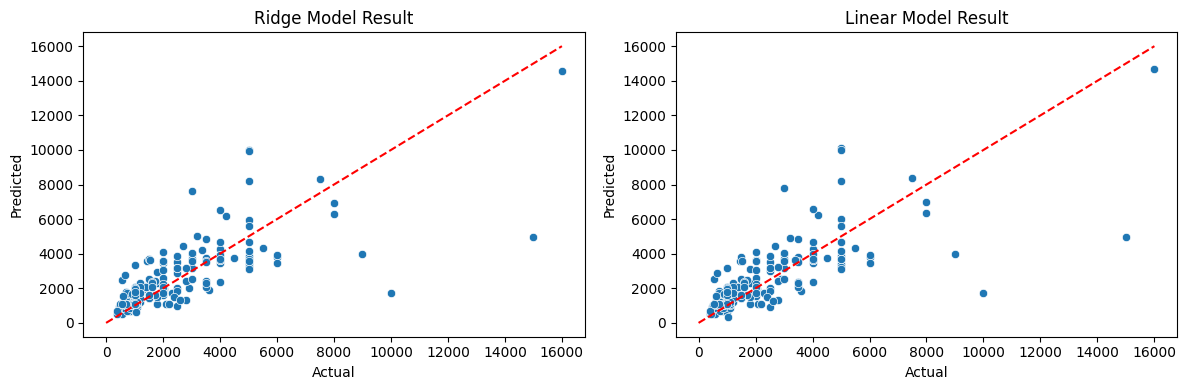

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Ridge Model
sns.scatterplot(data=ridge_results, x='Actual', y='Predicted', ax=axes[0])
axes[0].set_title('Ridge Model Result')
max_val_ridge = max(ridge_results['Actual'].max(), ridge_results['Predicted'].max())
axes[0].plot([0, max_val_ridge], [0, max_val_ridge], color='red', linestyle='--')

# Linear Model
sns.scatterplot(data=linear_results, x='Actual', y='Predicted', ax=axes[1])
axes[1].set_title('Linear Model Result')
max_val_linear = max(linear_results['Actual'].max(), linear_results['Predicted'].max())
axes[1].plot([0, max_val_linear], [0, max_val_linear], color='red', linestyle='--')

plt.tight_layout()
plt.show()


Files saved for model deployment

In [34]:
import pickle
import os 

os.makedirs('artifacts',exist_ok=True)

with open('artifacts/ridge_model.pkl','wb') as f:
    pickle.dump(ridge_model,f)      
with open('artifacts/linear_model.pkl','wb') as f:
    pickle.dump(linear_model,f)                     
with open('artifacts/preprocessor.pkl','wb') as f:
    pickle.dump(preprocessor,f)
print('All files saved in artifacts')

All files saved in artifacts
